In [ ]:
# 머신러닝 종류

  # - 지도 학습 : 입력과 타깃으로 이루어진 훈련데이터가 필요하다. 데이터를 '입력'이라 부르고 정답을'타깃'이라 부른다. 이둘을 합쳐 훈련 데이터라고 부른다. 입력으로 사용된 값을 특성이라고 부른다.
  # - 비지도 학습 : 입력 데이터만 있을 때 사용한다. 정답을 사용하지 않으므로 무언가를 맞힐 수 없다. 데이터를 잘 파악하거나 변형하는데 도움을 준다.
  # - 강화 학습 : 타깃이 아니라 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습한다.

# 샘플링 편향 : 훈련세트와 테스트세트에 샘플이 골고루 섞여 있지 않아 샘플링이 한쪽으로 치우쳤다는 의미

# 코드

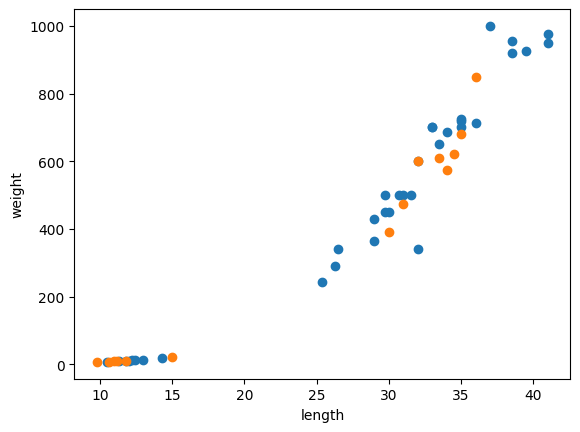

정확도 : 1.0

-- 생선이 도미인지 빙어인지 판단합니다. --

생선의 길이 : 30
생선의 무게 : 50

입력하신 생선은 빙어입니다.


In [12]:
# 훈련 세트와 테스트 세트

# 데이터 준비

import numpy as np

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_feature = np.array([[l, w] for l, w in zip(length, weight)])
fish_target = [1]*35 + [0]*14

# 하나의 생선 데이터를 샘플이라 부른다.
# 전체 데이터에는 도미 35마리 빙어 14마리 총 49개의 샘플이 있다.
# 데이터의 처음 35개를 훈련 세트로 나머지 14개를 테스트 세트로 사용한다.

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

train_feature = fish_feature[:35]
train_target = fish_target[:35]
test_feature = fish_feature[35:]
test_target = fish_target[35:]

kn = kn.fit(train_feature, train_target)    # 훈련
kn.score(test_feature, test_target)         # 정확도 반환

# 훈련세트에는 도미만 넣고 테스트세트에는 빙어만 넣었기 때문에 정확도가 0.0 으로 나온다.

# 리스트를 넘파이 배열로 바꾸기
feature_arr = np.array(fish_feature)
target_arr = np.array(fish_target)
# print(feature_arr)
# print(target_arr)

# shape : (행의개수,열의개수)를 출력

# print(feature_arr.shape)
# print(target_arr.shape)
# print(len(feature_arr))
# print(len(target_arr))

# 특성데이터와 타깃데이터에서 랜덤하게 샘플을 선택해 훈련세트와 테스트세트로 만든다.
# 특성데이터의 n번째와 타깃데이터의 n번째는 둘이 쌍을 이루기 때문에 함께 선택되어야한다.
# 넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만들기 때문에 일정한 결과를 만드려면 랜덤시드를 지정해야한다.

np.random.seed(42)
index = np.arange(49) # 0~48
np.random.shuffle(index)
# print(index)
# print(type(index))

#랜덤으로 셔플된 index ndarray의 초반 35개 값을 훈련세트로 나머지를 테스트세트로 만들기

train_feature = feature_arr[index[:35]]
train_target = target_arr[index[:35]]
test_feature = feature_arr[index[35:]]
test_target = target_arr[index[35:]]

# print(train_feature.shape)
# print(train_target.shape)
# print(test_feature.shape)
# print(test_target.shape)

# 훈련세트와 테스트세트에 도미와 빙어가 잘 섞여 있는지 산점도로 그려보기

import matplotlib.pyplot as plt

# scatter()에서 아래의 인덱싱 :
# - x값은 모든 행의 0번째 열.
# - y값은 모든 행의 1번째 열.

plt.scatter(train_feature[:,0], train_feature[:,1])
plt.scatter(test_feature[:,0], test_feature[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# - 파란색 훈련세트
# - 주황색 테스트세트

# print(train_feature.shape)
# print(train_target.shape)

# 훈련과 평가

kn = kn.fit(train_feature, train_target) # 훈련
print("정확도 :", kn.score(test_feature, test_target)) # 정확도 평가

# 예측하기

print("\n-- 생선이 도미인지 빙어인지 판단합니다. --\n")
input_l = input("생선의 길이 : ")
input_w = input("생선의 무게 : ")

result = kn.predict([[int(input_l), int(input_w)]]);

if result[0] == 1 : print("\n입력하신 생선은 도미입니다.")
else : print("\n입력하신 생선은 빙어입니다.")
